In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
from sklearn.preprocessing import quantile_transform

## Error

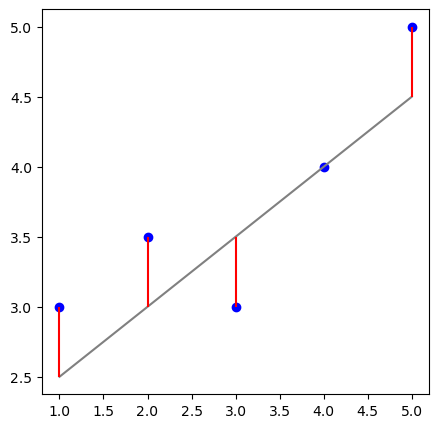

In [25]:
fig = plt.figure(figsize=(5, 5))
ax = fig.add_subplot(1, 1, 1)

x = [1, 2, 3, 4, 5]
a = [3, 3.5, 3, 4, 5]
p = [2 + 0.5 * _ for _ in x]

ax.plot(x, p, label="model", color="grey")
ax.scatter(x, a, color="blue")
ax.vlines(x, ymin=p, ymax=a, color="red")


None

## Quantile Transform

In [2]:
n = 5000
x = np.random.lognormal(0, 0.6, n) * 5
x_t = quantile_transform(x.reshape(-1, 1), n_quantiles=100)

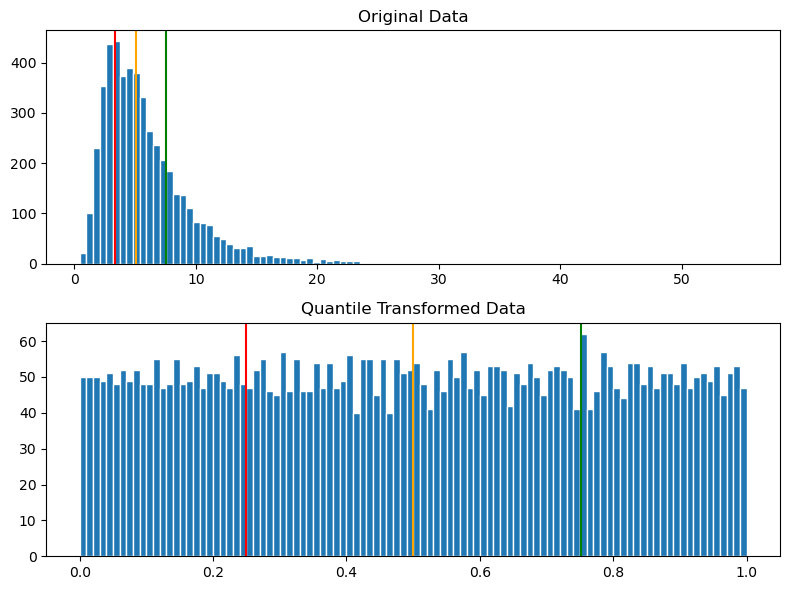

In [3]:
fig, axes = plt.subplots(2, 1, figsize=(8, 6))
colors = ["red", "orange", "green"]
titles = ["Original Data", "Quantile Transformed Data"]

for idx, series in enumerate((x, x_t)):
    axes[idx].hist(series, bins=100, edgecolor="white")
    axes[idx].set_title(titles[idx])
    quantiles = np.quantile(series, [0.25, 0.5, 0.75])
    for quantile, color in zip(quantiles, colors):
        axes[idx].axvline(x=quantile, color=color)

plt.tight_layout()